   
В рамках проекта проводится маркетинговая аналитика развлекательного приложения Procrastinate Pro+. 
    
Согласно условий задачи несмотря на активные инвестиции в рекламу последние несколько месяцев компания терпит убытки. 
    
<b>Цель проекта— разобраться в причинах и помочь компании выйти в плюс.</b>
    
Имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными о  посещениях,
- выгрузка покупок пользователей за этот период,
- рекламные расходы.

В ходе предварительной обработки данных в целях их подготовки к дальнейшему анализу будет проведен поиск дубликатов и пропусков, определение типов данных и их приведение в соответствие. Также данные будут приведены в формат, удобный для исследований.
    
<b>В ходе исследования предстоит определить:</b>
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

<b>Ход исследования</b>
- Загрузка и предобработка данных 
- Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии, построения графиков указанных значений и их динамики.
- Составление профилей пользователей и их анализ
- Исследование Маркетинговой стратегии
- Оценка окупаемости рекламы
- Общие  выводы и рекомендации



### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs =(pd.read_csv('/datasets/visits_info_short.csv'),
                        pd.read_csv('/datasets/orders_info_short.csv'),
                        pd.read_csv('/datasets/costs_info_short.csv'))

In [3]:
visits.info()
display(visits)
print('Количество явных дубликатов в таблице visits:', len(visits)-len(visits.drop_duplicates()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


Количество явных дубликатов в таблице visits: 0


Согласно предварительного анализа данных выявлено, что в таблице visits нет пропусков данных и явных дубликатов. Данные о дате и времени имеют тип object, ниже будет выполнено преобразование в тип datetime. Также для удобства стоит привести названия столбцов к нижнему регистру с заменой пробелов нижним подчеркиванием.

In [4]:
orders.info()
display(orders)
print('Количество явных дубликатов в таблице orders:', len(orders)-len(orders.drop_duplicates()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


Количество явных дубликатов в таблице orders: 0


В таблице orders также нет пропусков данных и явных дубликатов. Данные о дате и времени имеют тип object, ниже будет выполнено преобразование в тип datetime.

In [5]:
costs.info()
display(costs)
print('Количество явных дубликатов в таблице costs:', len(costs)-len(costs.drop_duplicates()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Количество явных дубликатов в таблице costs: 0


В таблице costs также нет пропусков данных и явных дубликатов. Данные о дате и времени имеют тип object, ниже будет выполнено преобразование в тип datetime.

In [6]:
# преобразование данных о времени
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
#переименование столбцов в таблицах
visits.columns=['user_id','region','device', 'channel', 'session_start', 'session_end']
orders.columns=['user_id','event_dt','revenue']
costs.columns=['dt', 'channel', 'costs']

Общий вывод о качестве данных - данные не содержат пропусков и явных дубликатов, во всех трех таблицах потребовалось приведение данных о датах и времени к соответствующим типам, также было выполнено приведение названий столбцов к удобному формату.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [8]:
# функция для создания пользовательских профилей из тренажера

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

  

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [9]:
# функция для расчёта удержания из тренажера

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [10]:

# функция для расчёта конверсии из тренажера

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# функция для расчёта LTV и ROI из тренажера

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [12]:
# функция для сглаживания фрейма из тренажера

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [13]:
# функция для визуализации удержания из тренажера

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Удержание')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Удержание')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Удержание')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Удержание')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [14]:
# функция для визуализации конверсии из тренажера

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('Конверсия')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('Конверсия')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации LTV и ROI из тренажера

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('LTV')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.ylabel('LTV')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.ylabel('CAC')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.ylabel('ROI')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.ylabel('ROI')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [16]:
# получаем профили пользователей
profiles = get_profiles(visits, orders,  costs)
display(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [17]:
# определение минимальной и максимальной дат привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].max())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Минимальная дата привлечения пользователей: 01.05.2019
Максимальная дата привлечения пользователей: 27.10.2019

Указанные данные соответствуют техническому заданию и условиям проектной работы.

In [18]:
#анализ продаж по странам
region_grouped=profiles.pivot_table(index='region', columns = 'payer', values='user_id', aggfunc='nunique').\
                rename(columns={True:'payers', False:'not_payers'}).sort_values(by='payers', ascending=False).reset_index()
region_grouped['total']= region_grouped['not_payers']+region_grouped['payers']
region_grouped=region_grouped.drop(columns = ['not_payers'],axis = 1)
region_grouped['payers,%']=region_grouped['payers']/region_grouped['total']*100
region_grouped=region_grouped[['region','total','payers','payers,%']]
display(region_grouped)

payer,region,total,payers,"payers,%"
0,United States,100002,6902,6.901862
1,UK,17575,700,3.982930
2,France,17450,663,3.799427
3,Germany,14981,616,4.111875


Согласно полученных данных из профилей пользователей, по странам со значительным отрывом лидирует США, общее количество пользователей составляет 100 002, также там значительно выше остальных процент платящих пользователей - 6,9%.

In [19]:
#анализ продаж по устройствам
device_grouped=profiles.pivot_table(index='device', columns = 'payer', values='user_id', aggfunc='nunique').\
                rename(columns={True:'payers', False:'not_payers'}).sort_values(by='payers', ascending=False).reset_index()
device_grouped['total']= device_grouped['not_payers']+device_grouped['payers']
device_grouped=device_grouped.drop(columns = ['not_payers'],axis = 1)
device_grouped['payers,%']=device_grouped['payers']/device_grouped['total']*100
device_grouped=device_grouped[['device','total','payers','payers,%']]
display(device_grouped)

payer,device,total,payers,"payers,%"
0,iPhone,54479,3382,6.207897
1,Android,35032,2050,5.851793
2,Mac,30042,1912,6.364423
3,PC,30455,1537,5.046790


Анализ профилей пользователей по устройствам показывает, что самым распространенным устройством является Iphone - 54479. Далее идут Android,PC,Mac. Наибольшее количество платных пользователей также на устргойствах Iphone - 3382. Процент платных пользователей выше у пользователей на устройствах Mac - 6,36%.

In [20]:
#анализ продаж по каналам привлечения
channel_grouped=profiles.pivot_table(index='channel', columns = 'payer', values='user_id', aggfunc='nunique').\
                rename(columns={True:'payers', False:'not_payers'}).sort_values(by='payers', ascending=False).reset_index()
channel_grouped['total']= channel_grouped['not_payers']+channel_grouped['payers']
channel_grouped=channel_grouped.drop(columns = ['not_payers'],axis = 1)
channel_grouped['payers,%']=channel_grouped['payers']/channel_grouped['total']*100
channel_grouped=channel_grouped[['channel','total','payers','payers,%']]
display(channel_grouped)

payer,channel,total,payers,"payers,%"
0,FaceBoom,29144,3557,12.204914
1,TipTop,19561,1878,9.600736
2,organic,56439,1160,2.055316
3,WahooNetBanner,8553,453,5.296387
4,AdNonSense,3880,440,11.340206
5,RocketSuperAds,4448,352,7.913669
6,LeapBob,8553,262,3.063253
7,OppleCreativeMedia,8605,233,2.707728
8,lambdaMediaAds,2149,225,10.469986
9,YRabbit,4312,165,3.826531


По каналам привлечения лидируют органические пользователи, из платных каналов лидирует FaceBoom - 29144.  Также FaceBoom на первом месте по количеству привлеченных покупателей - 3557, он же показывает наибольший процент пользователей, совершивших покупку - 12,2%. ЗА ним по проценту привлеченных пользователей, совершивших покупку идут AdNonSense	-11.34%, lambdaMediaAds	-10.4%

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [21]:
# расчет суммы расходов на маркетинг
print('Общая сумма расходов на маркетинг составила ',round(profiles['acquisition_cost'].sum(),1)) 


Общая сумма расходов на маркетинг составила  105497.3


Общая сумма расходов на маркетинг составила  105497.3

In [22]:
#анализ трат на маркетинг по рекламным источникам
channel_marketing=profiles.groupby('channel')['acquisition_cost'].sum().sort_values(ascending=False)
display(channel_marketing)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
organic                   0.00
Name: acquisition_cost, dtype: float64

Согласно анализа трат по рекламным источникам самым дорогим каналом привлечения является TipTop -54751.30. За ним следуют FaceBoom-32445.60 и WahooNetBanner -5151.00

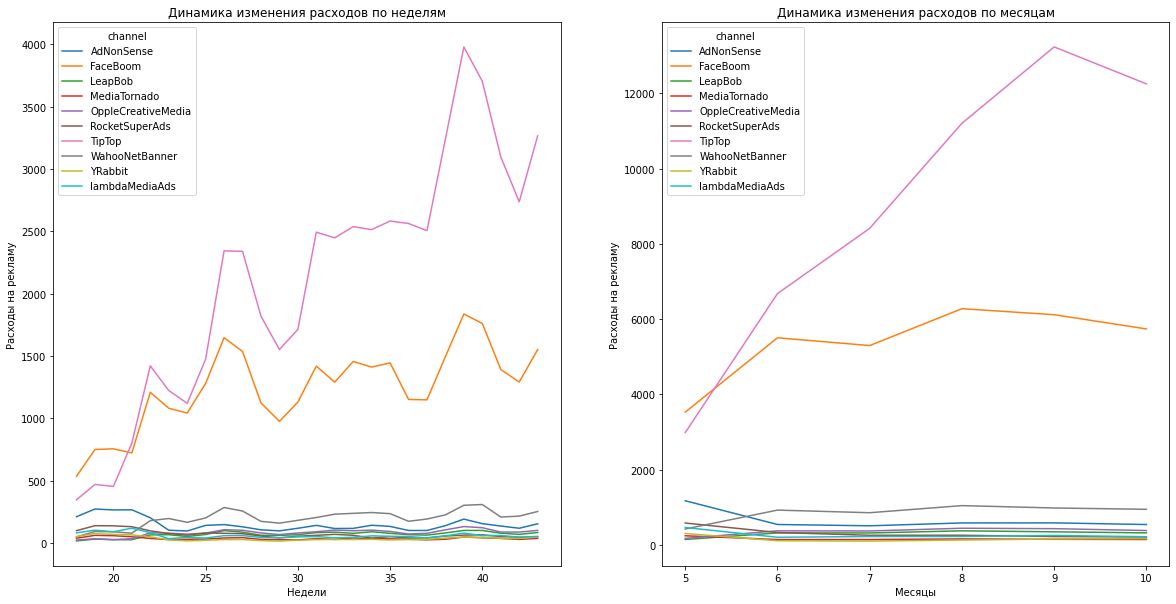

In [23]:
#построение визуализации динамики изменения расходов по неделям и месяцам по каждому источнику.
import matplotlib.pyplot as plt
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week']=costs['dt'].dt.isocalendar().week
costs['month']=pd.DatetimeIndex(costs['dt']).month

fig,ax=plt.subplots(1,2, figsize=(20,10))

costs.pivot_table(index=costs['week'], values='costs', aggfunc='sum', columns='channel').plot(ax=ax[0])
ax[0].set(title='Динамика изменения расходов по неделям' )
ax[0].set_xlabel("Недели")
ax[0].set_ylabel("Расходы на рекламу")


costs.pivot_table(index=costs['month'], values='costs', aggfunc='sum', columns='channel').plot(ax=ax[1])
ax[1].set(title='Динамика изменения расходов по месяцам')
ax[1].set_xlabel("Месяцы")
ax[1].set_ylabel("Расходы на рекламу")
plt.show()

Визуализация динамики изменения расходов по неделям и месяцам показывает, что траты на привлечение подвержены сезонности, летом и в начале осени траты максимальные, далее идет снижение. Также необходимо делать поправку на то, что  расходы на Tiptop и FaceBoom  значительно выше остальных и пользователей по ним привлекается значительно больше (данная информация получена из выше приведенных расчетов), поэтому данные источники наиболее информаивны.

In [24]:
#расчет средней стоимости привлечения одного пользователя (CAC) из каждого источника
cac_mean=profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)
display(cac_mean)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

In [25]:
print('Средняя стоимость привлечения одного пользователя (CAC):', profiles['acquisition_cost'].mean().round(3))

Средняя стоимость привлечения одного пользователя (CAC): 0.703


Самым дорогим каналом по средней стоимости привлечения одного пользователя (САС) является TipTop- 2.79.
Далее идут FaceBoom -1.11, AdNonSense -1.00.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [26]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа


Установили момент анализа - 01.11.2019, горизонт анализа - 14 дней.

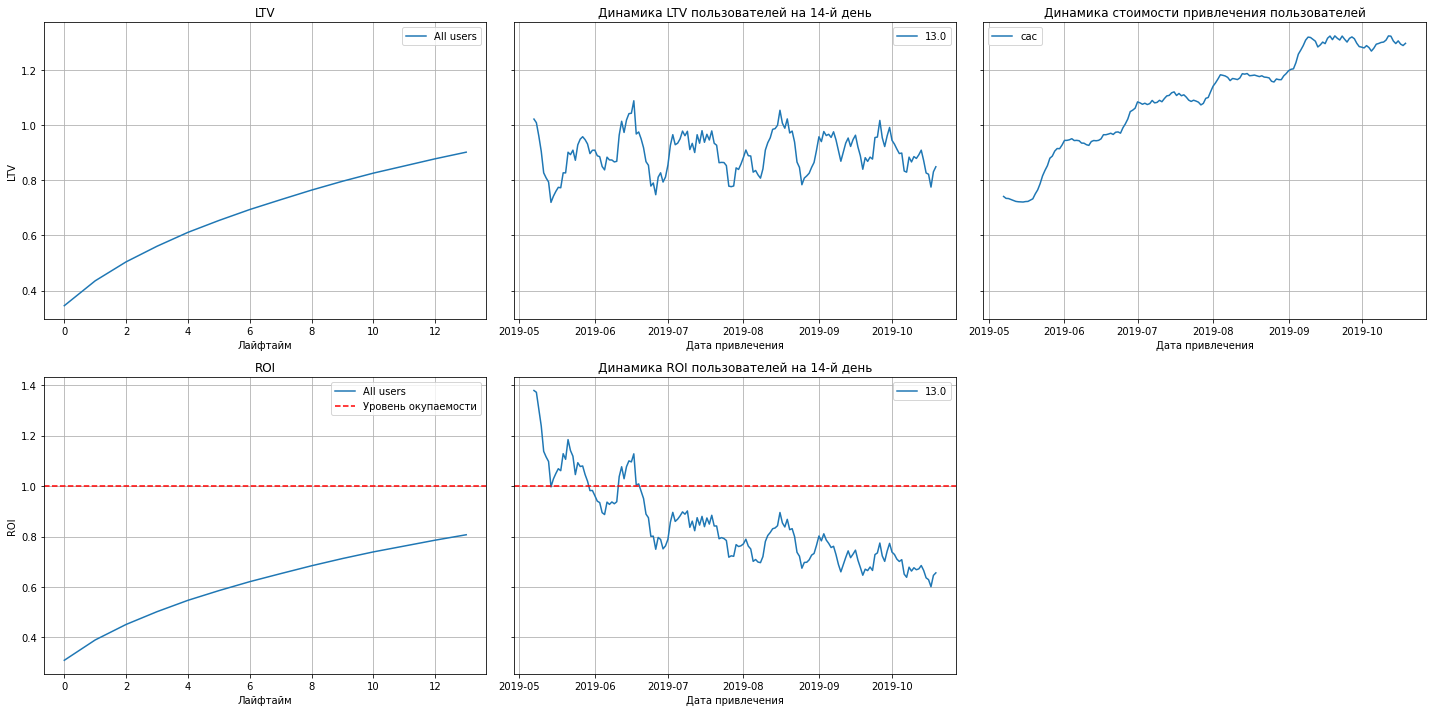

In [27]:
# считаем LTV и ROI
#исключение органических пользователей
profiles=profiles.query('channel!="organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

В целях корректности расчета из профилей исключены органические пользователи.
По графикам можно сделать такие выводы:
Реклама не окупается, т.к. ROI в конце лайфтайма — около 80%.
CAC растет. Возможно, дело в увеличении рекламного бюджета.
LTV стабилен. Значит, дело не в ухудшении качества пользователей.
Видна взаимосвязь увеличения стоимости CAC и снижения ROI ниже уровня окупаемости с  06.2019.


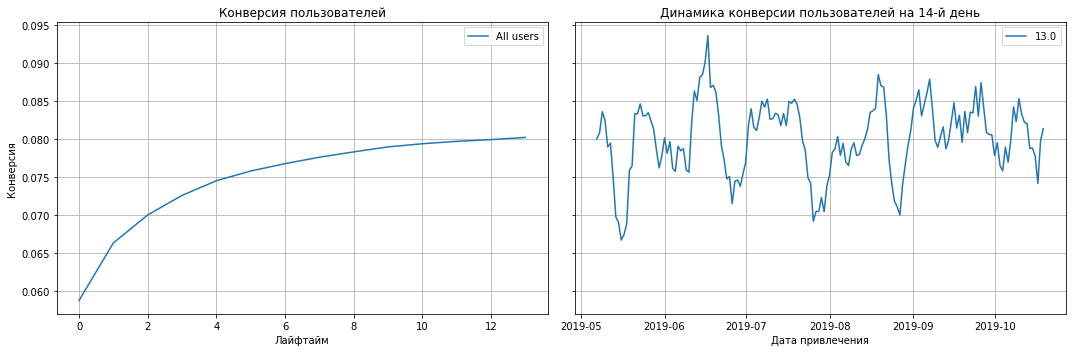

In [28]:
# Проверка конверсии пользователей и динамики её изменения.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графикам общая конверсия в норме  и динамика за период исследования не выявляет значительных отклонений конверсии.

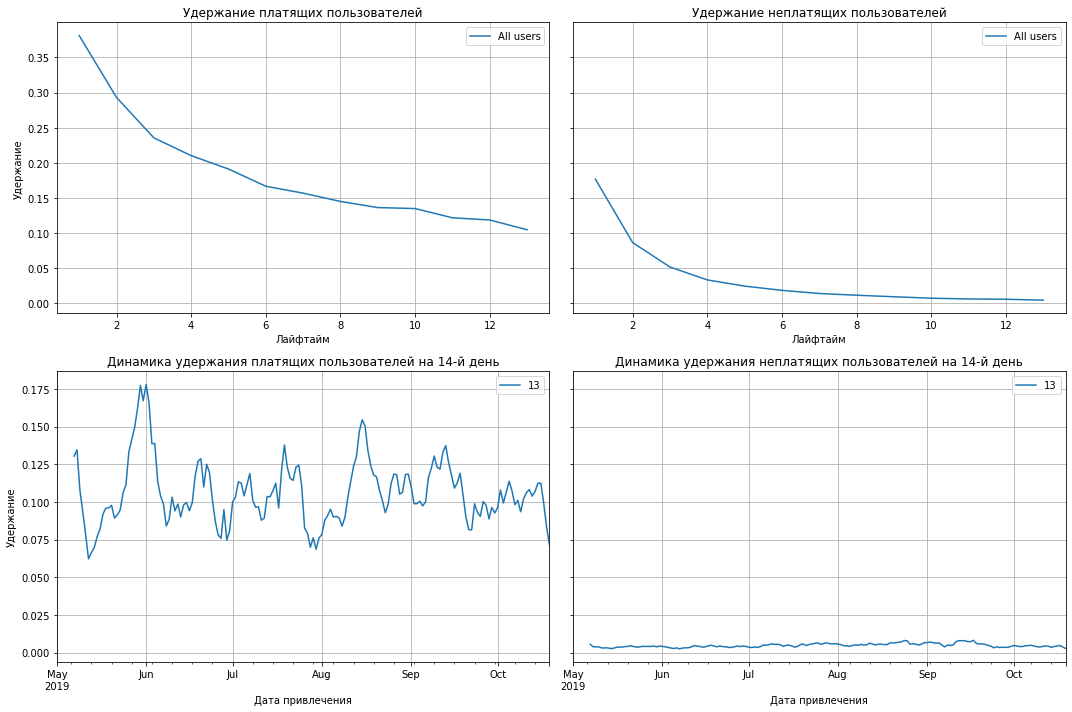

In [29]:
# проверка удержания пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

Согласно проведенного расчета пользователи удерживаются плохо, как платные так  и неплатящие. К концу лайфтайма практически нет удержания пользователей.


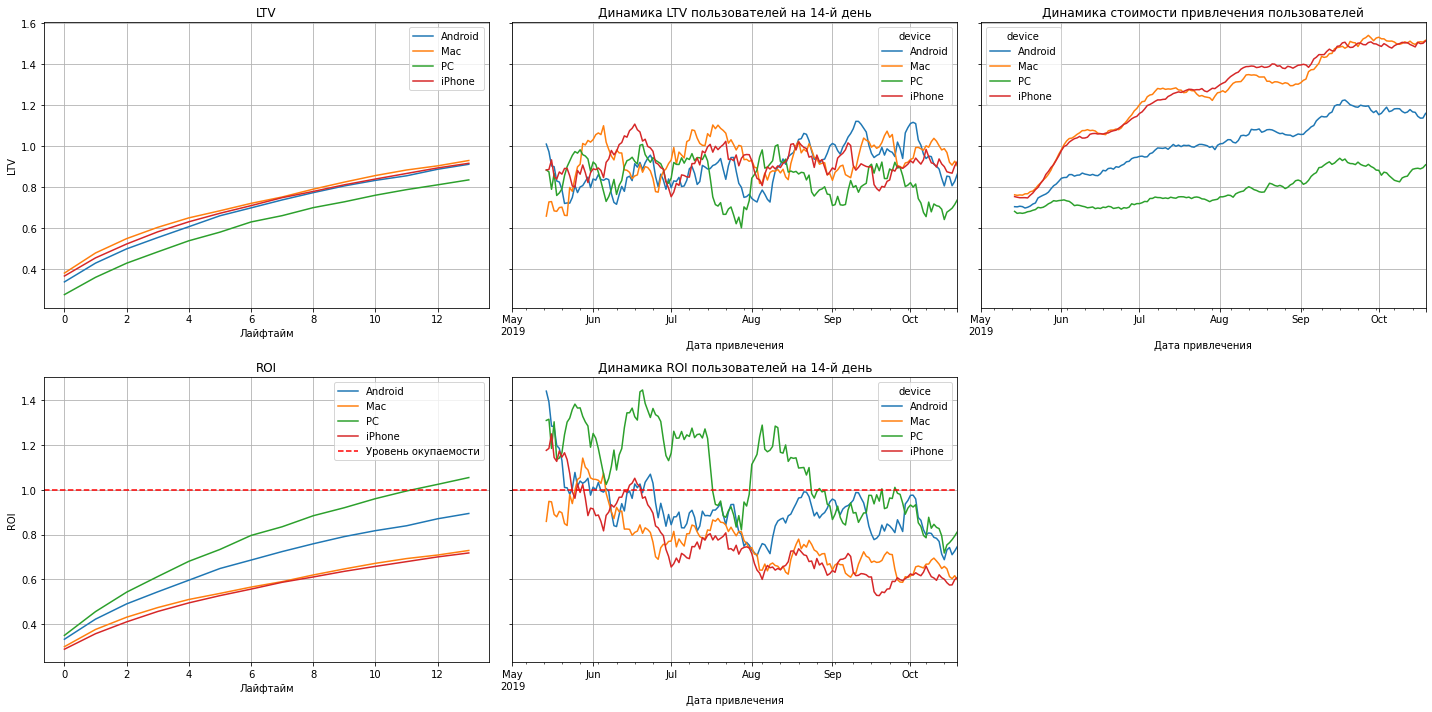

In [30]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Построенные графики окупаемости с разбивкой по устройствам показывают, что окупается только реклама на PC. Также стоит отметить, что до июня  реклама везде  давала ROI на конец лайфтайма выше уровня окупаемости, однако с ростом стоимости привлечения реклама перестала окупаться везде кроме PC. Ниже всех уровень окупаемости на Iphone  и Mac.

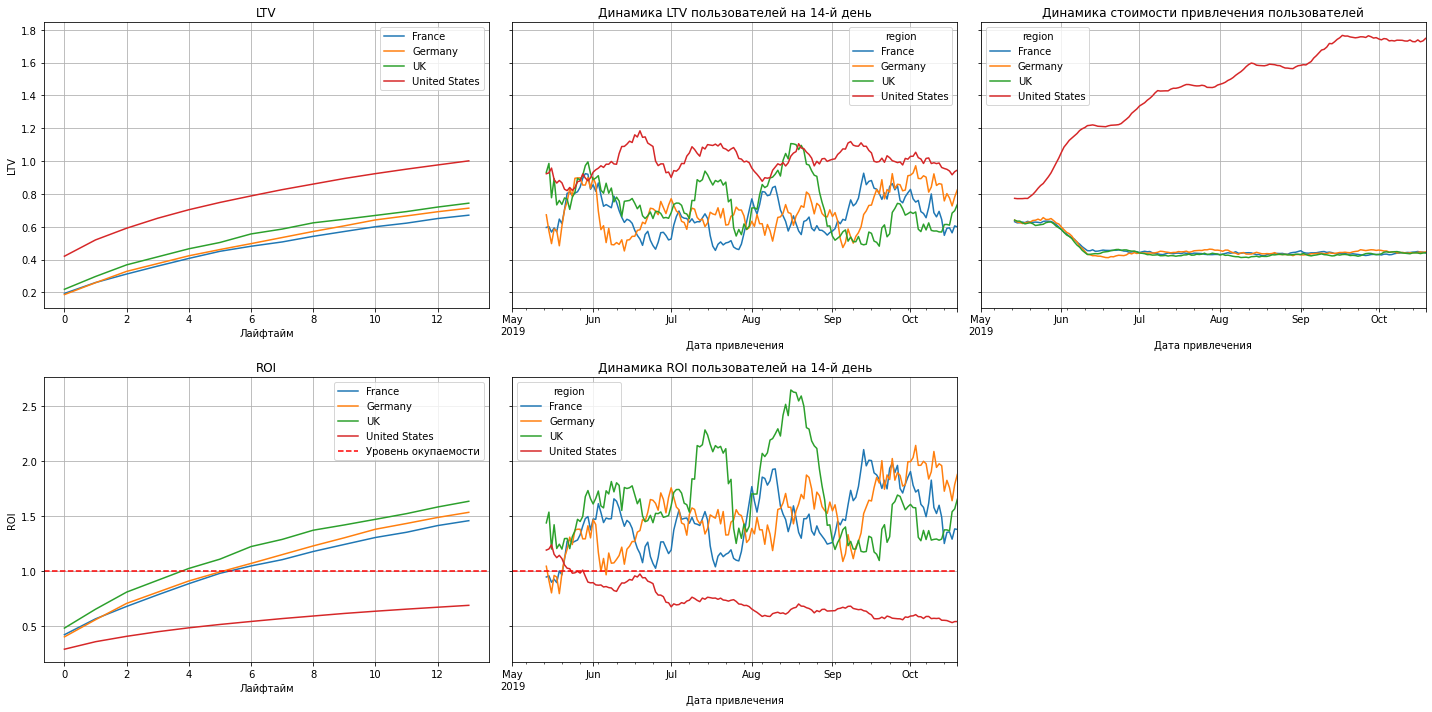

In [31]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

СОгласно данных об окупаемости с разбивкой по странам видно, что очень сильно растет стоимость привлечения пользователей из США. Однако, реклама в США не окупается даже к концу лайфтайма. Данная ситуация началась с июня 2019 года.

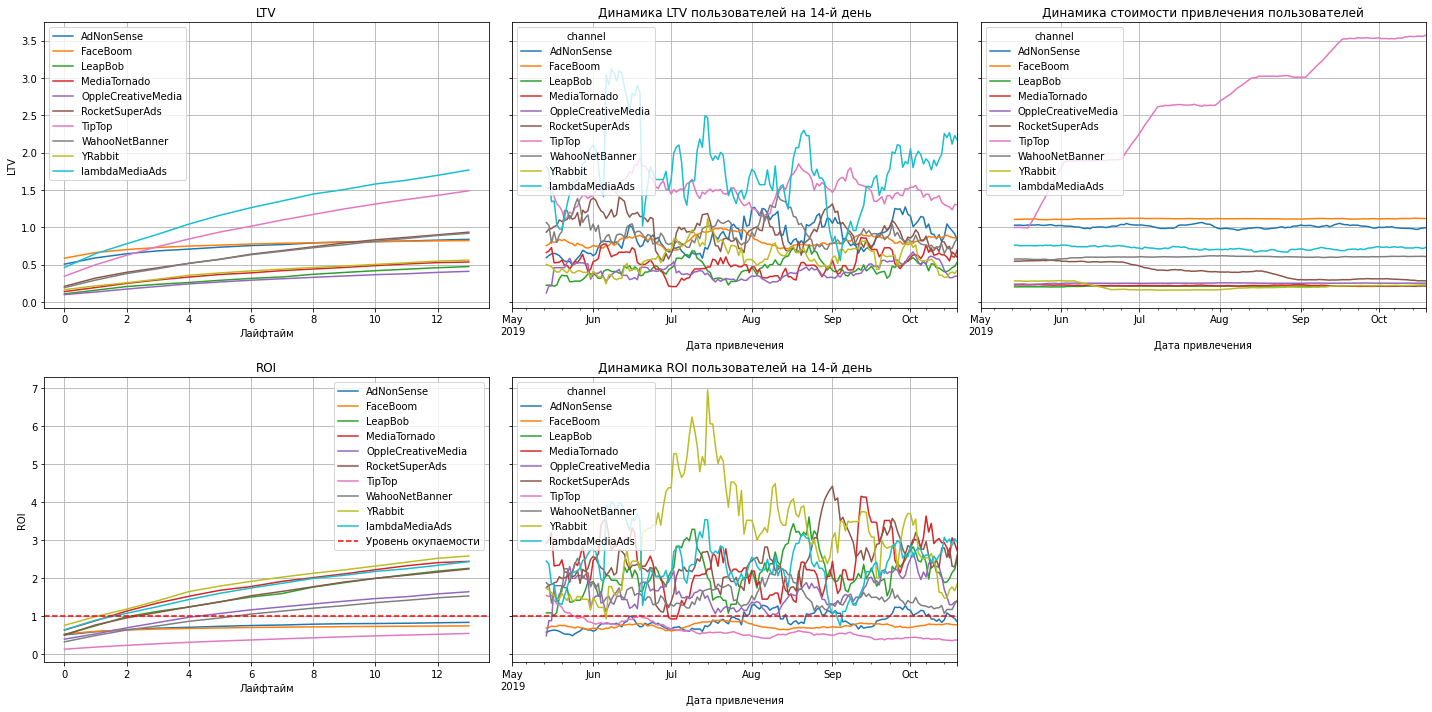

In [32]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По источникам привлечения согласно построоенных графиков видно, что с июня 2019 года очень сильно выросла стоимость привлечения по рекламному каналу TipTop, остальные каналы по стоимости практически не имеют динамики. ПРи этом по ROI канал TipTop к концу лайфтайма ниже окупаемости, тогда как практически все остальные каналы выходят на окупаемость (кроме FaceBoom, AdNonSense)

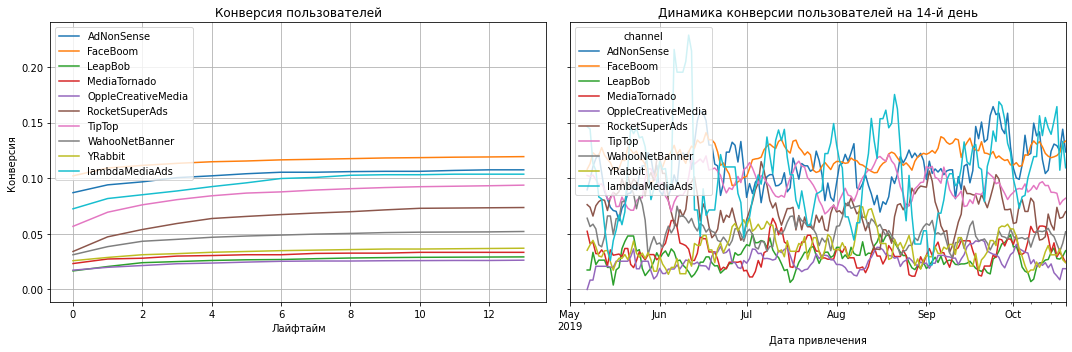

In [33]:
# Проверка конверсии пользователей и динамики её изменения по каналам.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Анализ конверсии по каналам привлечения показывает, что лучшую конверсию дает FaceBoom, далее около 10% конверсию дают каналы AdNonSense, lambdaMediaAds и Tiptop. Данные о динамике конверсии говорят о том, что AdNonSense, lambdaMediaAds имеют неоднородную конверсию, она может быть как высокой, около 15%, так и падать  ниже 5%.

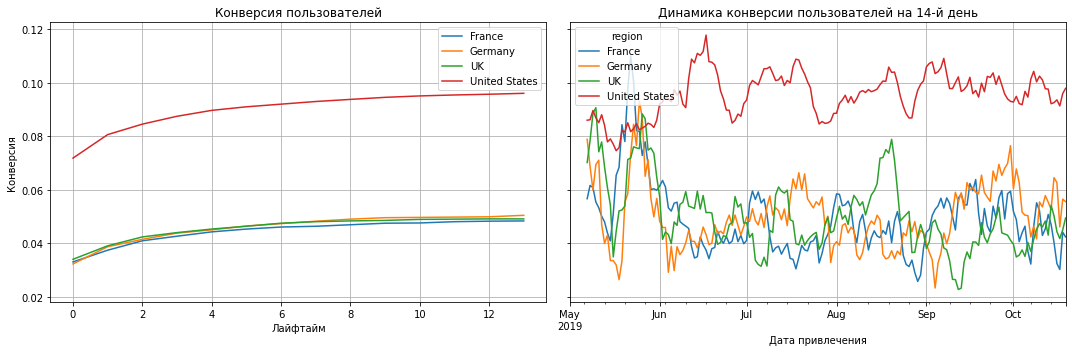

In [34]:
# Проверка конверсии пользователей и динамики её изменения по странам.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия по странам показывает, что лидером является США, стабильно показывая результат около 10%.

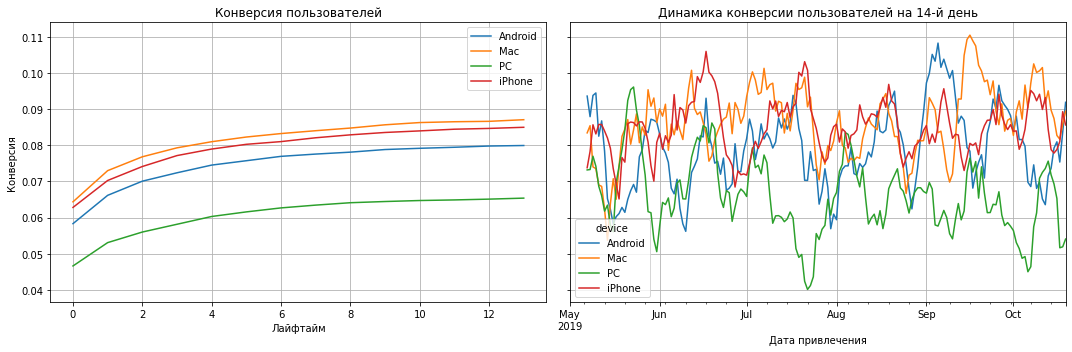

In [35]:
# Проверка конверсии пользователей и динамики её изменения по устройствам.

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Из устройств лучшая конверсия идет по Mac и Iphone, ниже всех по устройствам на PC. Однако в динамике также хорошую конверсию показывают устройства на Android, что говорит о перспективности инвестирования в рекламу на данные устройства.

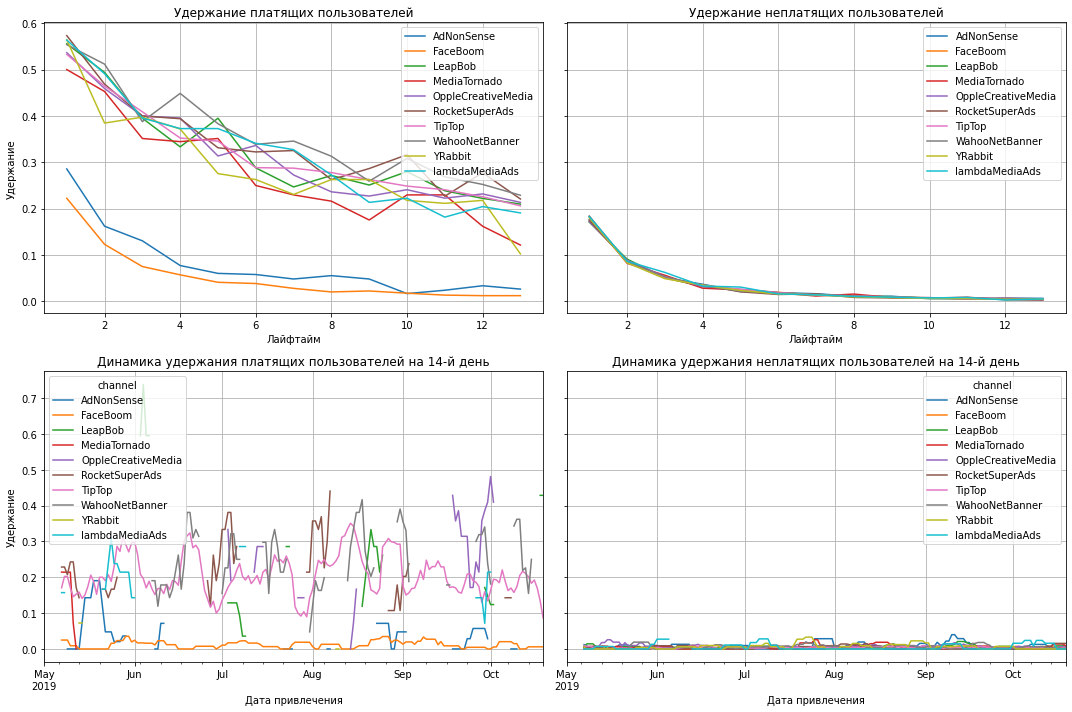

In [36]:
# проверка удержания пользователей по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Согласно данных об удержании пользователей по каналам привлечения, каналы AdNonSense и FaceBoom имеют самый низкий показатель, остальные каналы в среднем показывают одинаковый уровень удержания платящих пользователей.

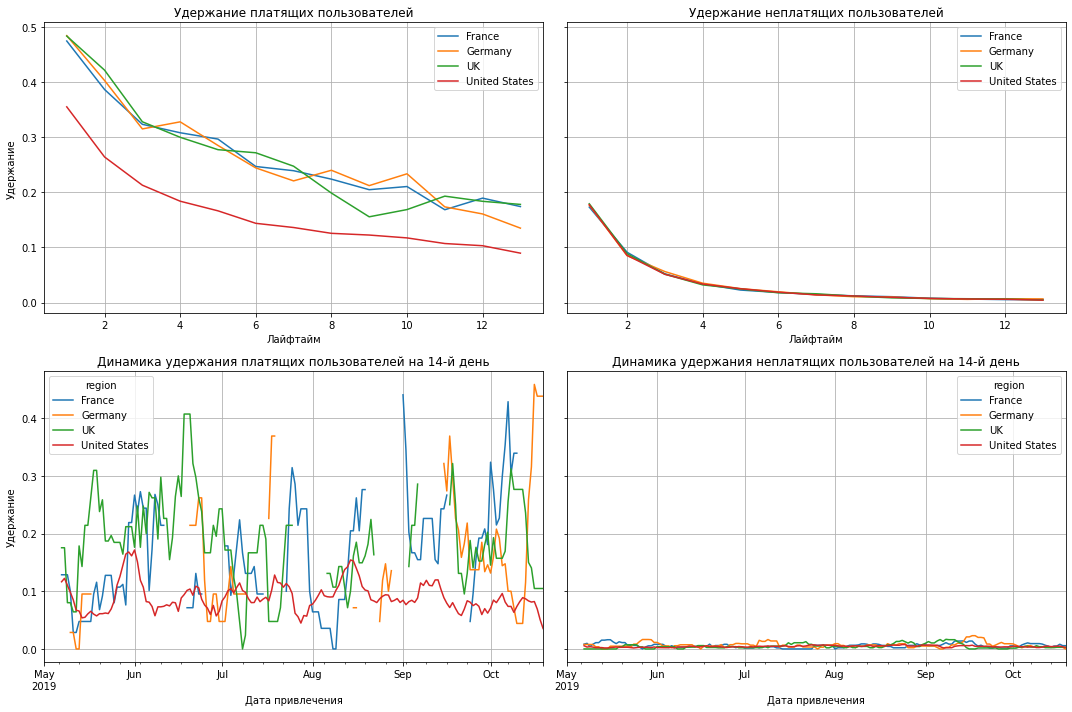

In [37]:
# проверка удержания пользователей по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

По уровню удержания США имеют самый низкий показатель, страны Европы показывают несколько лучший уровень удержания, однако надо брать во внимание, что США имеют самый большой объем привлеченных пользователей.

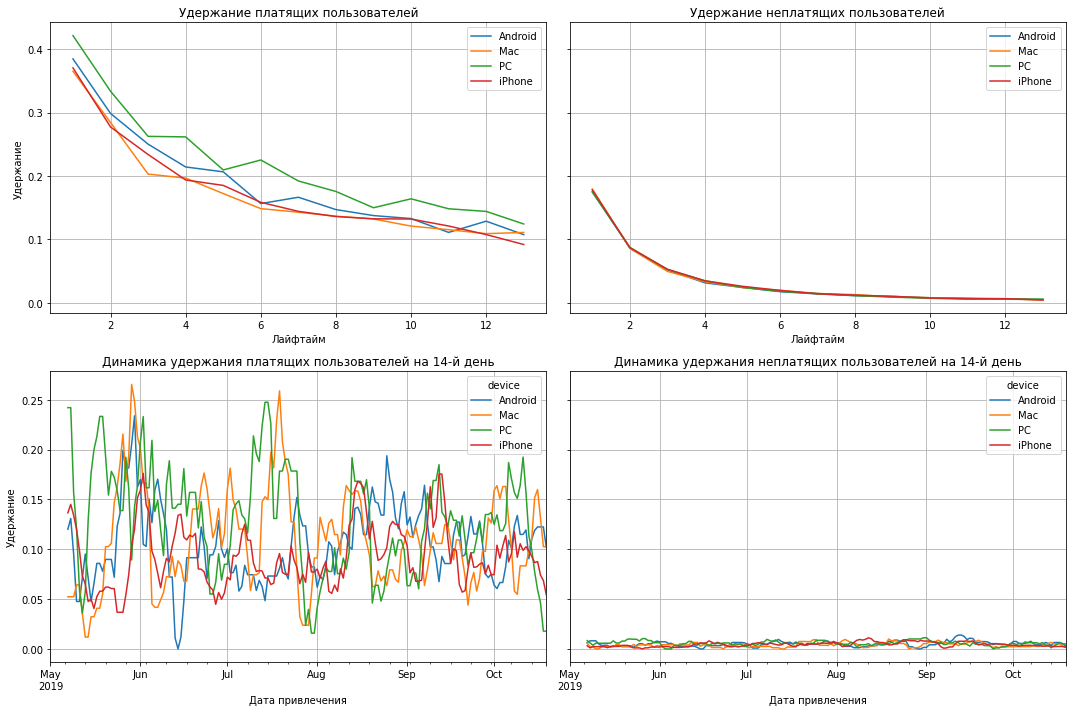

In [38]:
# проверка удержания пользователей по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

По уровню удержания по устройствам значительных различий не выявлено, в динамике видна связь удержания с видом устройства - компьютеры (Mac, PC) или мобильные (Iphone, Android)

**Ответы на вопросы:**

**1. Окупается ли реклама, направленная на привлечение пользователей в целом?**


да, в основном реклама окупается, но не на всех площадках и не во всех регионах.

**2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**


Негативное влияние на уровень окупаемости заметно в регионе США, на устройствах Iphone и Macб по рекламным каналам Tiptop и FaceBoom.

**3. Чем могут быть вызваны проблемы окупаемости?**


Проблемы окупаемости согласно проведенного анализа вызваны значительным ростом стоимости рекламы в канале TipTop, из-за чего общая окупаемость стала сильно снижаться, а также большой стоимостью привлечения по каналу FaceBoom, который на конец лайфтайма таже не выходит на окупаемость.

**С учетом того, что регион США является самым большим по количеству пользователей, необходимо провести анализ окупаемости по источникам конкретно по США.**

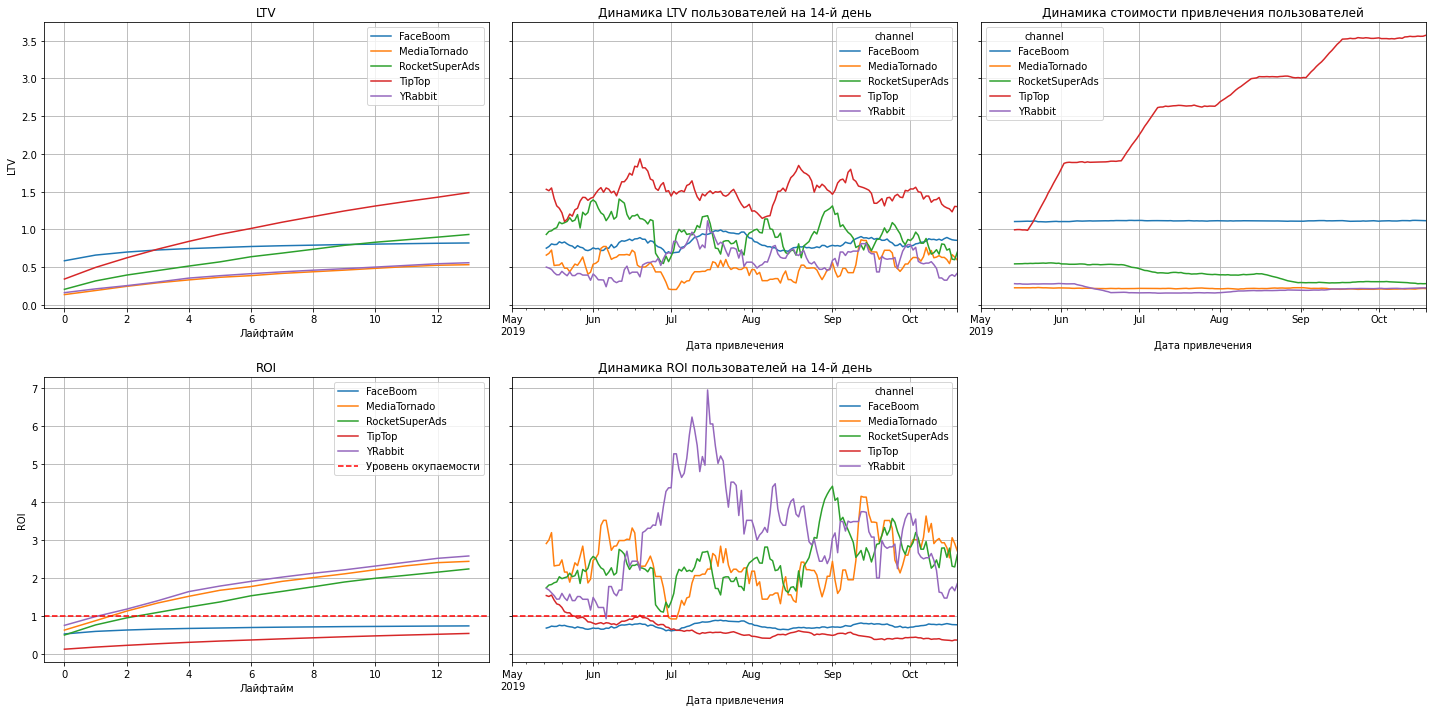

In [39]:
# смотрим окупаемость с разбивкой по источникам привлечения в США
profiles=profiles.query('region=="United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Анализ данных по региону США показывает, что LTV по каналу TipTop намного выше остальных каналов, и его динамика стабильно высокая. ОДнако и стоимость привлечения по данному каналу сильно выросла с июня, что негативно влияет на окупаемость. ROI  по данному каналу на конец лаймтайма ниже уровня окупаемости, но динамика ROI показывает, что  имеется тенденция к снижению ROI по данному каналу. НА данный момент инвестиции в TipTop не  окупаются.

Также можно отметить, что по каналу FaceBoom  инвестиции в привлечение не являются прибыльными. Несмотря на то, что стоимость привлечения по данному каналу не растет,на уровень окупаемости ROI  не выходит и динамика говорит, что раньше расходы на FaceBoom окупались, а после июня 2019 года уже нет.

Также стоит проверить удержание пользователей по региону США.

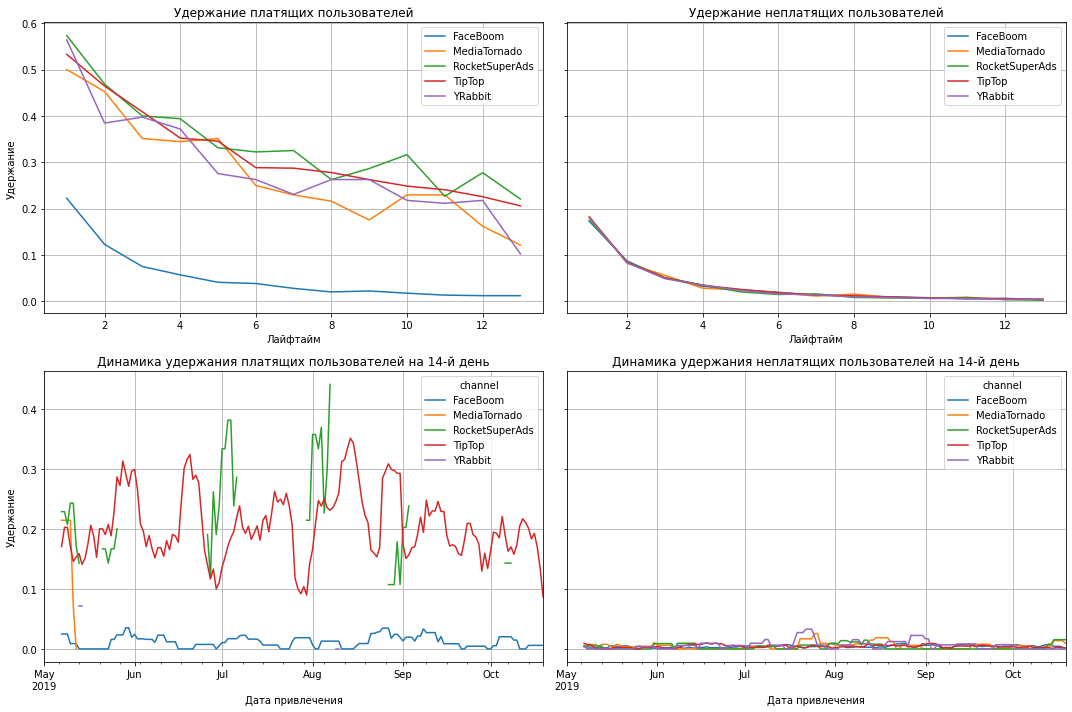

In [40]:
# проверка удержания пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Выполненный анализ удержания по каналам по региону США показывает, что канал FaceBoom неэффективен для привлечения пользователей. Удержание  как платящих так и не платящих пользователей практически отсутствует.Расходы на данный канал стабильно не окупаются.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Согласно полученных данных из профилей пользователей, по странам со значительным отрывом лидирует США, общее количество пользователей составляет 100 002, также там значительно выше остальных процент платящих пользователей - 6,9%.

Анализ профилей пользователей по устройствам показывает, что самым распространенным устройством является Iphone - 54479. Далее идут Android,PC,Mac. Наибольшее количество платных пользователей также на устргойствах Iphone - 3382. Процент платных пользователей выше у пользователей на устройствах Mac - 6,36%.

По каналам привлечения лидируют органические пользователи, из платных каналов лидирует FaceBoom - 29144.  Также FaceBoom на первом месте по количеству привлеченных покупателей - 3557, он же показывает наибольший процент пользователей, совершивших покупку - 12,2%. ЗА ним по проценту привлеченных пользователей, совершивших покупку идут AdNonSense	-11.34%, lambdaMediaAds	-10.4%

Общая сумма расходов на маркетинг составила  105497.29

Согласно анализа трат по рекламным источникам самым дорогим каналом привлечения является TipTop -54751.30. За ним следуют FaceBoom-32445.60 и WahooNetBanner -5151.00

Визуализация динамики изменения расходов по неделям и месяцам показывает, что траты на привлечение подвержены сезонности, летом и в начале осени траты максимальные, далее идет снижение. Также необходимо делать поправку на то, что  расходы на Tiptop и FaceBoom  значительно выше остальных и пользователей по ним привлекается значительно больше (данная информация получена из выше приведенных расчетов), поэтому данные источники наиболее информативны.

Самым дорогим каналом по средней стоимости привлечения одного пользователя (САС) является TipTop- 2.79.
Далее идут FaceBoom -1.11, AdNonSense -1.00.

Согласно проведенного анализа данных выявлено, что:
Реклама не окупается, т.к. ROI в конце лайфтайма — около 80%.
CAC растет. Возможно, дело в увеличении рекламного бюджета.
LTV стабилен. Значит, дело не в ухудшении качества пользователей.
Видна взаимосвязь увеличения стоимости CAC и снижения ROI ниже уровня окупаемости с  06.2019.

Судя по графикам, общая конверсия в норме  и динамика за период исследования не выявляет значительных отклонений конверсии.

Анализ конверсии по каналам привлечения показывает, что лучшую конверсию дает FaceBoom, далее около 10% конверсию дают каналы AdNonSense, lambdaMediaAds и Tiptop. Данные о динамике конверсии говорят о том, что AdNonSense, lambdaMediaAds имеют неоднородную конверсию, она может быть как высокой, около 15%, так и падать ниже 5%.

Конверсия по странам показывает, что лидером является США, стабильно показывая результат около 10%.

Из устройств лучшая конверсия идет по Mac и Iphone, ниже всех по устройствам на PC. Однако в динамике также хорошую конверсию показывают устройства на Android, что говорит о перспективности инвестирования в рекламу на данные устройства.

Согласно проведенного расчета, пользователи удерживаются плохо, как платные так  и неплатящие. К концу лайфтайма практически нет удержания пользователей.

Согласно данных об удержании пользователей по каналам привлечения, каналы AdNonSense и FaceBoom имеют самый низкий показатель, остальные каналы в среднем показывают одинаковый уровень удержания платящих пользователей.

По уровню удержания США имеют самый низкий показатель, страны Европы показывают несколько лучший уровень удержания, однако надо брать во внимание, что США имеют самый большой объем привлеченных пользователей.

По уровню удержания по устройствам значительных различий не выявлено, в динамике видна связь удержания с видом устройства - компьютеры (Mac, PC) или мобильные (Iphone, Android)

Построенные графики окупаемости с разбивкой по устройствам показывают, что окупается только реклама на PC. Также стоит отметить, что до июня  реклама везде  давала ROI на конец лайфтайма выше уровня окупаемости, однако с ростом стоимости привлечения реклама перестала окупаться везде кроме PC. Ниже всех уровень окупаемости на Iphone  и Mac.

СОгласно данных об окупаемости с разбивкой по странам видно, что очень сильно растет стоимость привлечения пользователей из США. Однако, реклама в США не окупается даже к концу лайфтайма. Данная ситуация началась с июня 2019 года.

По источникам привлечения согласно построоенных графиков видно, что с июня 2019 года очень сильно выросла стоимость привлечения по рекламному каналу TipTop, остальные каналы по стоимости практически не имеют динамики. ПРи этом по ROI канал TipTop к концу лайфтайма ниже окупаемости, тогда как практически все остальные каналы выходят на окупаемость (кроме FaceBoom, AdNonSense)

В основном реклама окупается, но не на всех площадках и не во всех регионах.

Негативное влияние на уровень окупаемости заметно в регионе США, на устройствах Iphone и Macб по рекламным каналам Tiptop и FaceBoom.

Проблемы окупаемости согласно проведенного анализа вызваны значительным ростом стоимости рекламы в канале TipTop, из-за чего общая окупаемость стала сильно снижаться, а также большой стоимостью привлечения по каналу FaceBoom, который на конец лайфтайма таже не выходит на окупаемость.

Анализ данных по региону США показывает, что LTV по каналу TipTop намного выше остальных каналов, и его динамика стабильно высокая. ОДнако и стоимость привлечения по данному каналу сильно выросла с июня, что негативно влияет на окупаемость. ROI  по данному каналу на конец лаймтайма ниже уровня окупаемости, но динамика ROI показывает, что  имеется тенденция к снижению ROI по данному каналу. НА данный момент инвестиции в TipTop не  окупаются.

Также можно отметить, что по каналу FaceBoom  инвестиции в привлечение не являются прибыльными. Несмотря на то, что стоимость привлечения по данному каналу не растет,на уровень окупаемости ROI  не выходит и динамика говорит, что раньше расходы на FaceBoom окупались, а после июня 2019 года уже нет.

Выполненный анализ удержания по каналам по региону США показывает, что канал FaceBoom неэффективен для привлечения пользователей. Удержание  как платящих так и не платящих пользователей практически отсутствует.Расходы на данный канал стабильно не окупаются.

Общими причинами неэффективности привлечения являются большие расходы на привлечение через каналы FaceBoom И TipTop. 

Рекомендацией для отдела маркетинга является сокращение расходов на канал FaceBoom и пересмотр методов привлечения через канал TipTop ( поиск уменьшения стоимости привлечения пользователей по данному каналу). Каналы `Yrabbit` и `RocketSuperAds` по региону США показывают ROI в динамике значительно выше уровня окупаемости. В данные каналы стоит инвестировать.